In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../Data/selected_data/merged_data.csv')
data.info()

C:\Users\kaush\AppData\Local\Temp\ipykernel_32836\1736518648.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Data/selected_data/merged_data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217242 entries, 0 to 217241
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           217242 non-null  int64  
 1   batter               217242 non-null  object 
 2   bowler               217242 non-null  object 
 3   non_striker          217242 non-null  object 
 4   runs_by_bat          217242 non-null  int64  
 5   extra_runs           217242 non-null  int64  
 6   total_runs_delivery  217242 non-null  int64  
 7   current_team_total   217242 non-null  int64  
 8   runs_remain          217117 non-null  float64
 9   batter_runs          217242 non-null  int64  
 10  balls_faced          217242 non-null  int64  
 11  wickets_fallen       217242 non-null  int64  
 12  delivery             217242 non-null  int64  
 13  over                 217242 non-null  int64  
 14  extra_type           217242 non-null  object 
 15  wicket_type      

In [63]:
# Drop the columns that are not needed
columns_needed = ['match_id', 'over', 'delivery', 'current_team_total', 'final_team_total', 'wickets_fallen', 'innings']
rrdata = data[columns_needed]

In [64]:
# only the last entry of an over is needed
# to get this, we will group the data by match_id, innings and over
# and then get the last entry of each group
rrdata = rrdata.groupby(['match_id', 'innings', 'over']).last().reset_index()


# drop the columns the delivery
rrdata = rrdata.drop('delivery', axis=1)

# offset over by 1
rrdata['over'] = rrdata['over'] + 1

# calculate the run rate
rrdata['run_rate'] = rrdata['current_team_total'] / (rrdata['over'])
rrdata.head(20)

,match_id,innings,over,current_team_total,final_team_total,wickets_fallen,run_rate
0,Afghanistan_Bangladesh_2018-06-03,1,1,9,167,0,9.000000
1,Afghanistan_Bangladesh_2018-06-03,1,2,13,167,0,6.500000
2,Afghanistan_Bangladesh_2018-06-03,1,3,23,167,0,7.666667
3,Afghanistan_Bangladesh_2018-06-03,1,4,27,167,0,6.750000
4,Afghanistan_Bangladesh_2018-06-03,1,5,42,167,0,8.400000
5,Afghanistan_Bangladesh_2018-06-03,1,6,44,167,0,7.333333
6,Afghanistan_Bangladesh_2018-06-03,1,7,55,167,0,7.857143
7,Afghanistan_Bangladesh_2018-06-03,1,8,60,167,0,7.500000
8,Afghanistan_Bangladesh_2018-06-03,1,9,64,167,1,7.111111
9,Afghanistan_Bangladesh_2018-06-03,1,10,72,167,1,7.200000


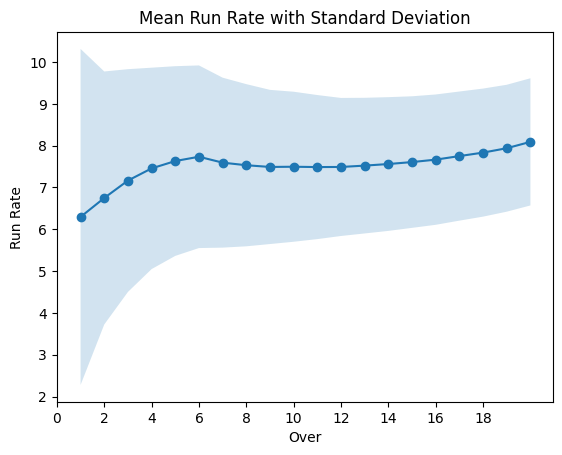

In [66]:
# finding  the mean run rate for each over 
rrdata_grouped_over = rrdata.groupby('over')
mean_rr = rrdata_grouped_over['run_rate'].mean()

# finding the median run rate for each over
median_rr = rrdata_grouped_over['run_rate'].median()

# finding the standard deviation of the run rate for each over
std_rr = rrdata_grouped_over['run_rate'].std()

# plot the mean of the run rate with the standard deviation
# the standard deviation will be shown as a shaded region
# overs is a discrete variable, the x-axis will have discrete values

plt.plot(mean_rr.index, mean_rr, '-o')
plt.fill_between(mean_rr.index, mean_rr - std_rr, mean_rr + std_rr, alpha=0.2)
plt.xlabel('Over')
plt.xticks(np.arange(0, 20, 2))
plt.ylabel('Run Rate')
plt.title('Mean Run Rate with Standard Deviation')
plt.show()

# plt.errorbar(mean_rr.index, mean_rr, yerr=std_rr, fmt='-o')
# plt.xlabel('Over')
# plt.ylabel('Run Rate')
# plt.title('Mean Run Rate with Standard Deviation')
# plt.show()






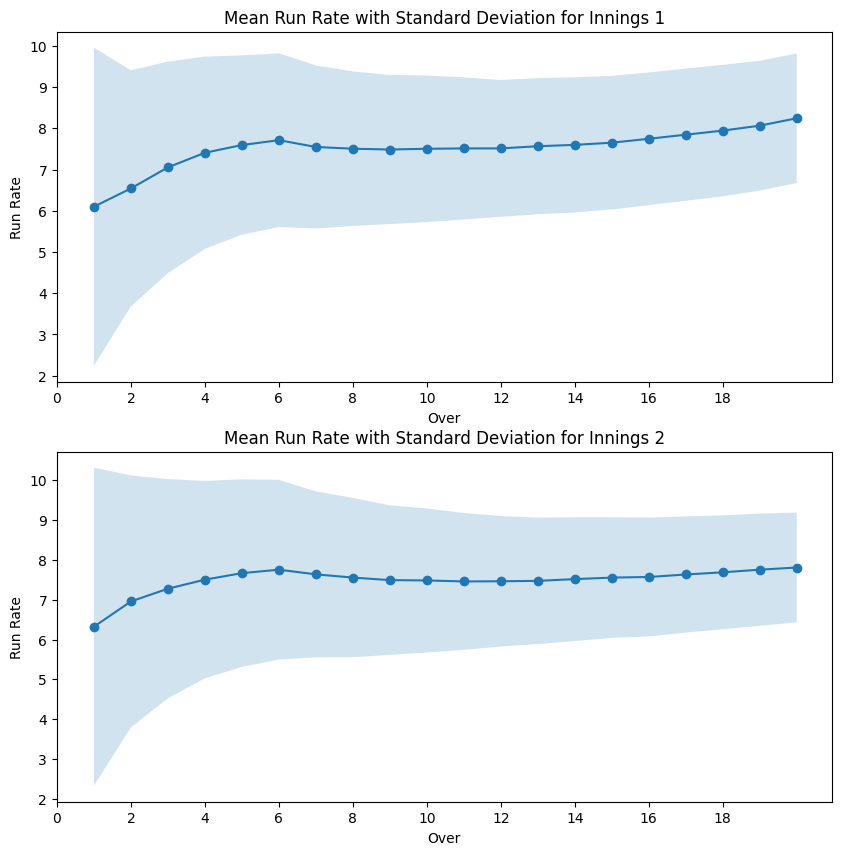

In [67]:
# similarly, but for each innings separately
rrdata_grouped_innings = rrdata.groupby(['innings', 'over'])
mean_rr_innings = rrdata_grouped_innings['run_rate'].mean()
median_rr_innings = rrdata_grouped_innings['run_rate'].median()
std_rr_innings = rrdata_grouped_innings['run_rate'].std()

# plot the mean of the run rate with the standard deviation
# the standard deviation will be shown as a shaded region
# overs is a discrete variable, the x-axis will have discrete values
# separate plots for each innings

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(mean_rr_innings.loc[1].index, mean_rr_innings.loc[1], '-o')
ax[0].fill_between(mean_rr_innings.loc[1].index, mean_rr_innings.loc[1] - std_rr_innings.loc[1], mean_rr_innings.loc[1] + std_rr_innings.loc[1], alpha=0.2)
ax[1].plot(mean_rr_innings.loc[2].index, mean_rr_innings.loc[2], '-o')
ax[1].fill_between(mean_rr_innings.loc[2].index, mean_rr_innings.loc[2] - std_rr_innings.loc[2], mean_rr_innings.loc[2] + std_rr_innings.loc[2], alpha=0.2)

for i in range(2):
	ax[i].set_xlabel('Over')
	ax[i].set_xticks(np.arange(0, 20, 2))
	ax[i].set_ylabel('Run Rate')
	ax[i].set_title(f'Mean Run Rate with Standard Deviation for Innings {i+1}')
plt.show()
